# Enron EDA

## 1. Loading the dataset

In [2]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from ggplot import *
from IPython.display import Image
import warnings
from feature_engineering.feature_format import feature_format, target_feature_split
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'
with open("./data/final_project_dataset.pkl", "rb") as data_file:
    data_dict = pickle.load(data_file)

In [12]:
df = pd.DataFrame.from_records(list(data_dict.values()), index=data_dict.keys())
df = df.replace('NaN', 0).drop(['email_address'], axis=1)

In [13]:
features_list = ['poi'] + list(df.columns.values)

In [14]:
my_dataset = df.to_dict('index')
data = feature_format(my_dataset, features_list, sort_keys = True)
labels, features = target_feature_split(data)

In [15]:
len(features)

145

## 2. Dataframe stats

#### 2.1 Number of 'NaN'

In [16]:
def counts(col, tag):
    counter = 0
    for each in col:
        if each == tag:
            counter += 1
    return counter
df.apply(lambda col: counts(col, 'NaN'), axis=0)

bonus                        0
deferral_payments            0
deferred_income              0
director_fees                0
exercised_stock_options      0
expenses                     0
from_messages                0
from_poi_to_this_person      0
from_this_person_to_poi      0
loan_advances                0
long_term_incentive          0
other                        0
poi                          0
restricted_stock             0
restricted_stock_deferred    0
salary                       0
shared_receipt_with_poi      0
to_messages                  0
total_payments               0
total_stock_value            0
dtype: int64

#### 2.2 Datatype Count

In [17]:
dtype_df = df.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,bool,1
1,int64,19


#### 2.3 Dataframe Memory Usage

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, METTS MARK to GLISAN JR BEN F
Data columns (total 20 columns):
bonus                        146 non-null int64
deferral_payments            146 non-null int64
deferred_income              146 non-null int64
director_fees                146 non-null int64
exercised_stock_options      146 non-null int64
expenses                     146 non-null int64
from_messages                146 non-null int64
from_poi_to_this_person      146 non-null int64
from_this_person_to_poi      146 non-null int64
loan_advances                146 non-null int64
long_term_incentive          146 non-null int64
other                        146 non-null int64
poi                          146 non-null bool
restricted_stock             146 non-null int64
restricted_stock_deferred    146 non-null int64
salary                       146 non-null int64
shared_receipt_with_poi      146 non-null int64
to_messages                  146 non-null int64
total_payments  

## Data Pattern

#### POI counts

In [19]:
df.replace('NaN', 0, inplace=True)
POI_type = {'POI': len(df[df.poi == True]), 
            'non POIs': len(df[df.poi == False])}
pd.DataFrame(list(POI_type.items()), 
             columns=['Class', 'Counts'])

,Class,Counts
0,non POIs,128
1,POI,18


#### Correlation

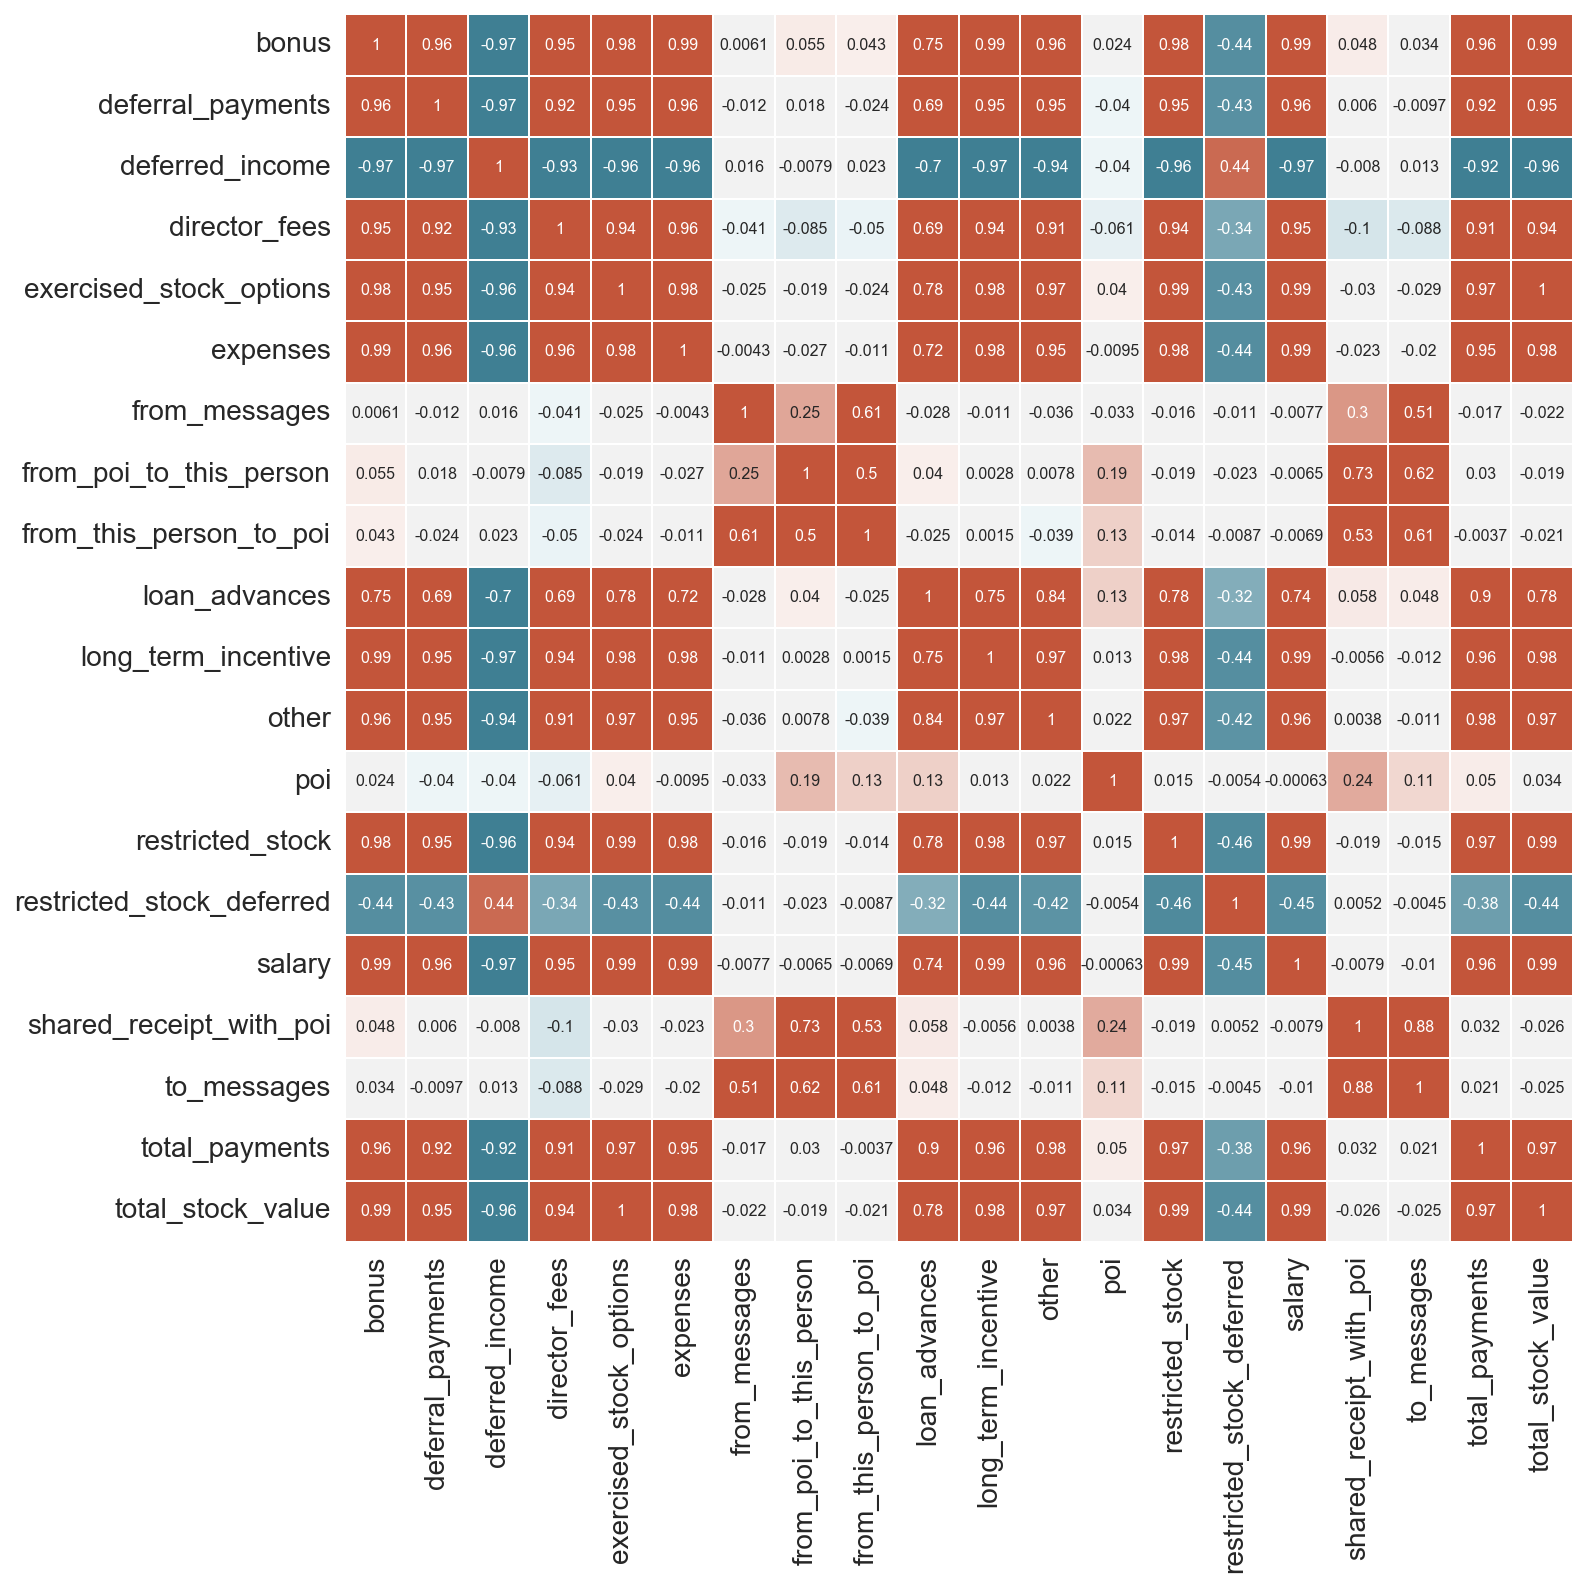

In [20]:
sns.set(font_scale=1.4)
f, ax = plt.subplots(figsize=(14, 11))
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
ax = sns.heatmap(df.corr(), cmap=cmap, vmax=.5, vmin=-.3, center=0,
            square=True, linewidths=.5, cbar=0,
           annot=True, annot_kws={"size":8})
plt.show()

## Univariate Analysis

In [21]:
df = df[df.index != 'TOTAL']

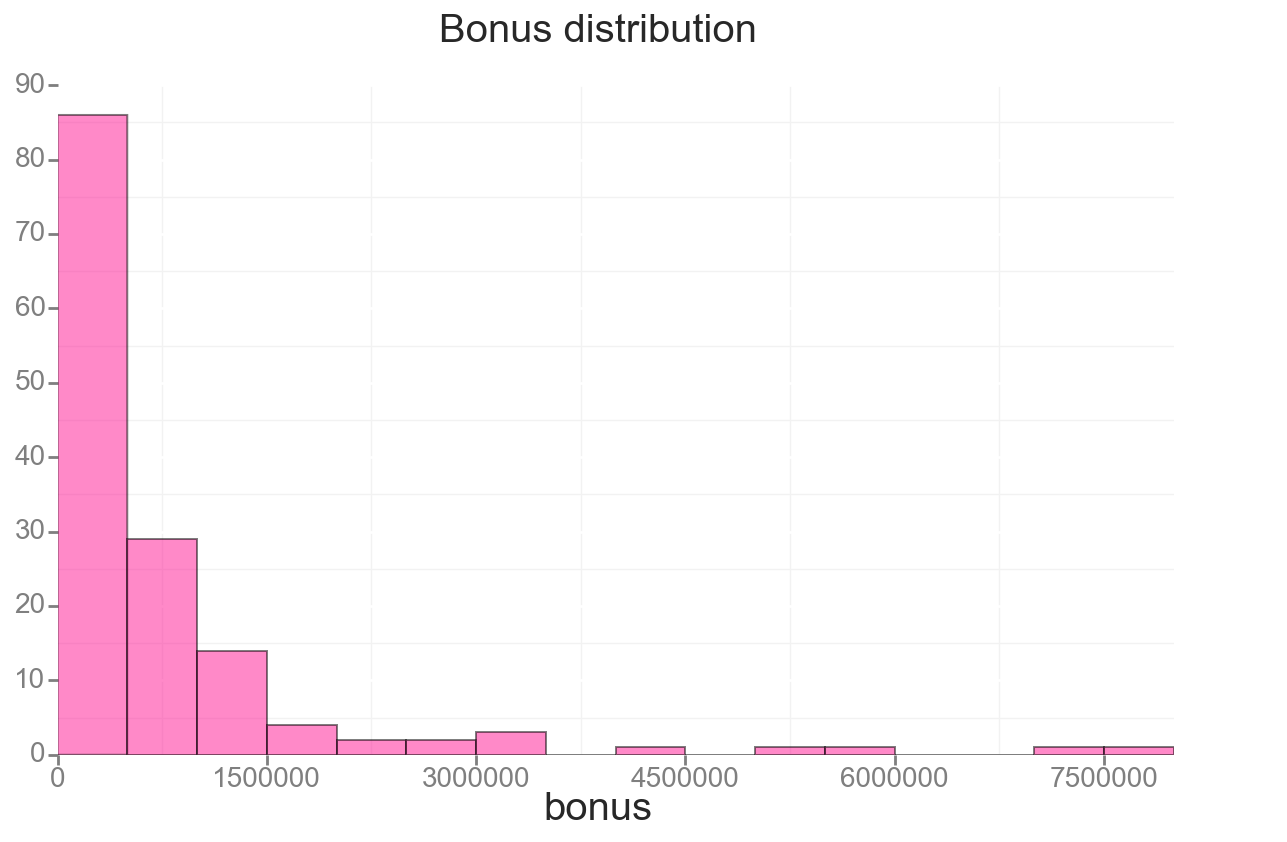

<ggplot: (289092837)>

In [22]:
h = ggplot(aes(x='bonus'), data=df) + \
    geom_histogram(binwidth=500000, 
                   fill='deeppink',
                   color='black',
                   alpha=0.5) +\
    theme(plot_title=element_text(size=20)) +\
    scale_x_continuous(breaks=range(0, 8000000, 1500000)) +\
    ggtitle('Bonus distribution')

t = theme_bw()
t._rcParams['font.size'] = 20
t._rcParams['figure.figsize'] = 10, 6
h + t

As we can see that the data is highly skewed but most situalted from **0 to 1500000** Lets look at the data within this range

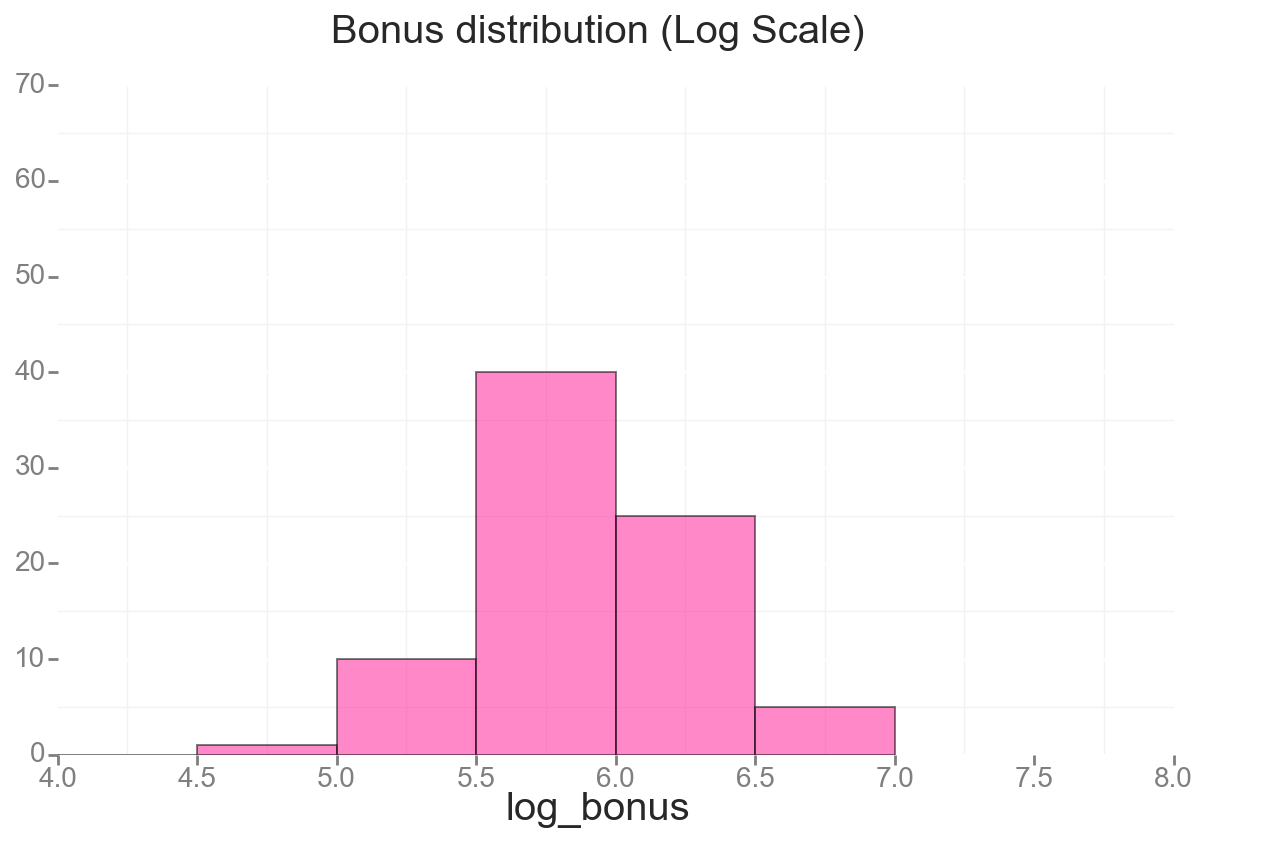

<ggplot: (291188537)>

In [23]:
df['log_bonus'] = np.log10(df.bonus + 0.1)
h = ggplot(aes(x='log_bonus'), data=df) + \
    geom_histogram(binwidth=.5, 
                   fill='deeppink',
                   color='black',
                   alpha=0.5) +\
    theme(plot_title = element_text(size=20)) +\
    scale_x_continuous(limits=(4, 8)) +\
    ggtitle('Bonus distribution (Log Scale)')
t = theme_bw()
t._rcParams['font.size'] = 20
t._rcParams['figure.figsize'] = 10, 6
h + t

The distribution seems pretty normal barring the people with 0 bonus.

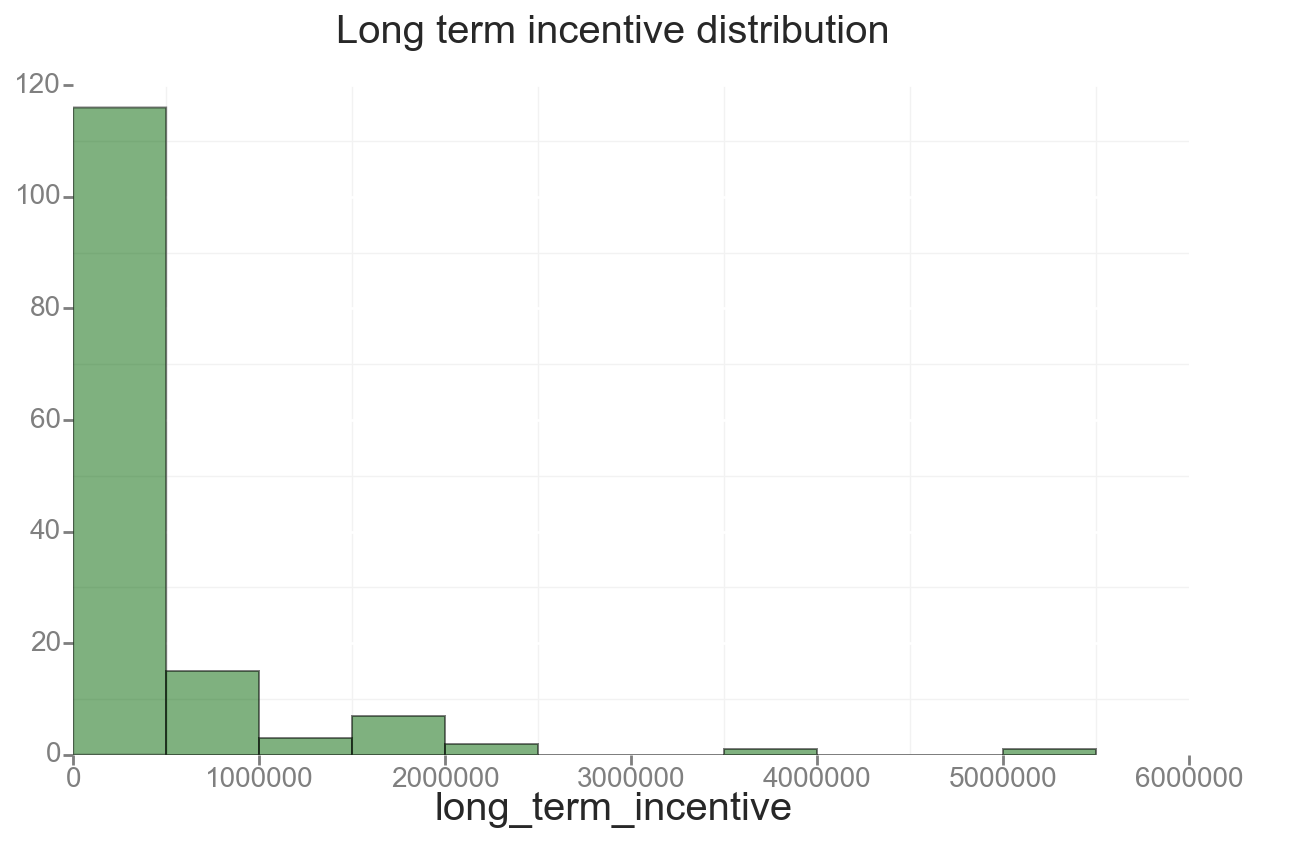

<ggplot: (291068177)>

In [24]:
h = ggplot(aes(x='long_term_incentive'), data=df) + \
    geom_histogram(binwidth=500000, 
                   fill='darkgreen',
                   color='black',
                   alpha=0.5) +\
    theme(plot_title = element_text(size=20)) +\
    ggtitle('Long term incentive distribution')

t = theme_bw()
t._rcParams['font.size'] = 20
t._rcParams['figure.figsize'] = 10, 6
h + t

## Feature Importance

#### Using Random Forest

In [30]:
Image(url="./img/importance_random_forest.png", retina=True)

#### Using XGBoost

In [31]:
Image(url="./img/importance_xgboost.png", retina=True)

In [32]:
new_df = pd.read_pickle('final_df.pkl')

We can see from the feature importance that **poi_interaction** and **deferred_income** are the two most important features. Let's explore these variables

## Distribution of **poi_interaction**

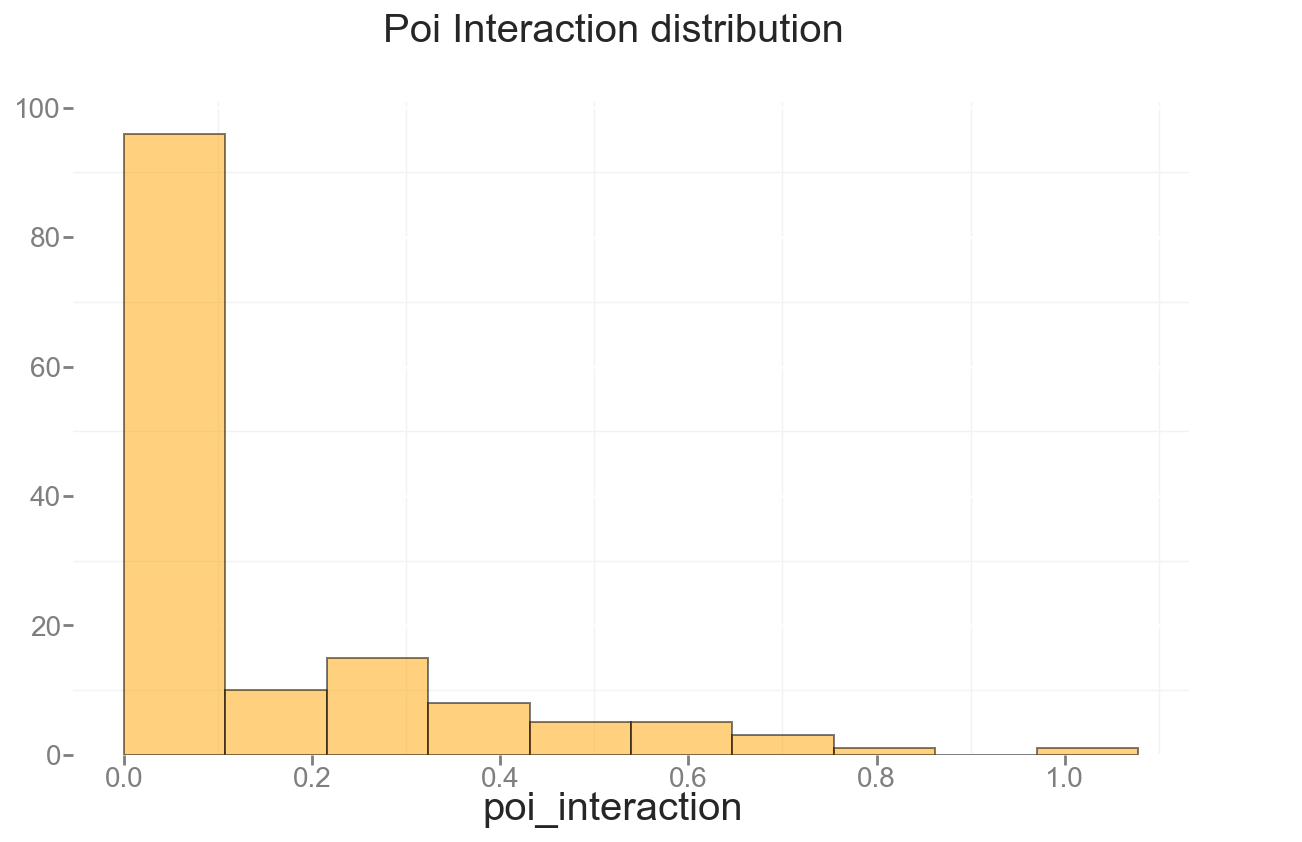

<ggplot: (288129433)>

In [39]:
h = ggplot(aes(x='poi_interaction'), data=new_df) + \
    geom_histogram(fill='orange',
                   color='black',
                   alpha=0.5) +\
    theme(plot_title = element_text(size=20)) +\
    ggtitle('Poi Interaction distribution')

t = theme_bw()
t._rcParams['font.size'] = 20
t._rcParams['figure.figsize'] = 10, 6
h + t

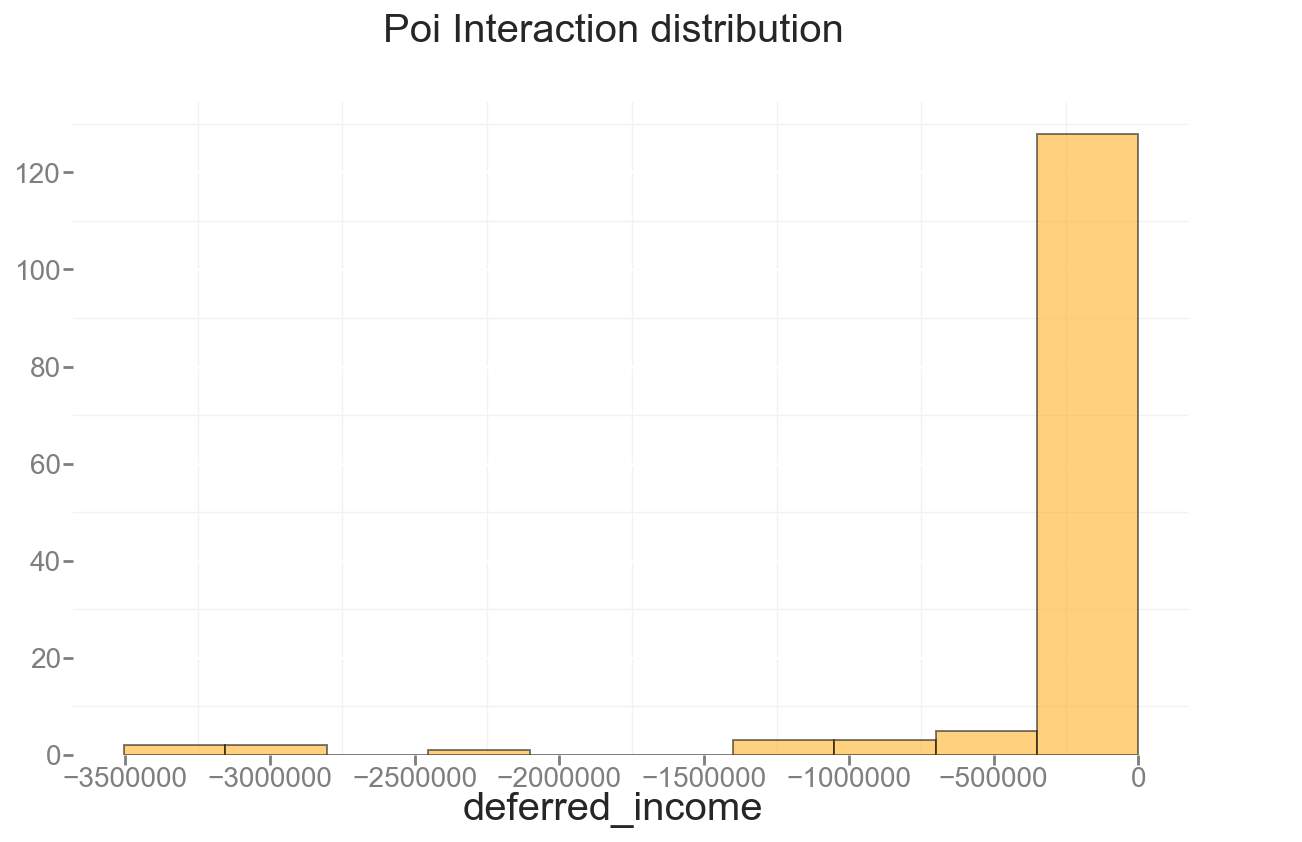

<ggplot: (288440877)>

In [40]:
h = ggplot(aes(x='deferred_income'), data=new_df) + \
    geom_histogram(fill='orange',
                   color='black',
                   alpha=0.5) +\
    theme(plot_title = element_text(size=20)) +\
    ggtitle('Poi Interaction distribution')

t = theme_bw()
t._rcParams['font.size'] = 20
t._rcParams['figure.figsize'] = 10, 6
h + t

In [59]:
new_df.groupby('poi').describe().poi_interaction.reset_index()

,poi,count,mean,std,min,25%,50%,75%,max
0,0,126.0,0.107872,0.193074,0.0,0.000000,0.002628,0.110921,1.078125
1,1,18.0,0.305648,0.217444,0.0,0.227383,0.272092,0.430112,0.686872


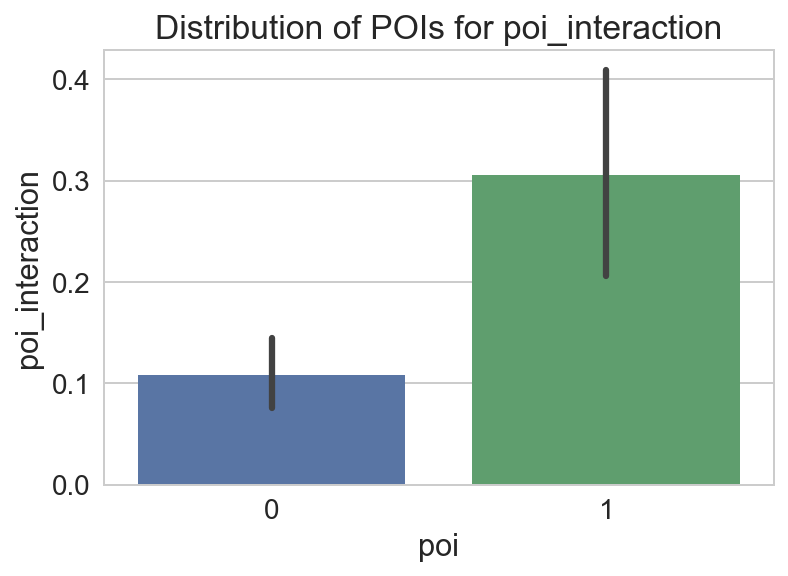

In [64]:
sns.set_style("whitegrid")
sns.barplot(y='poi_interaction', x='poi', data=new_df)
plt.title('Distribution of POIs for poi_interaction')
plt.show()